In [2]:
# importing the libraries
import pandas as pd
import numpy as np
import os

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [3]:
print(os.listdir("../IdentifyTheApparel"))


['.ipynb_checkpoints', 'AV_FashionMnist_CNN.ipynb', 'AV_IdentifyTheApparel.ipynb', 'sample_submission_I5njJSF.csv', 'submission.csv', 'test_ScVgIM0', 'test_ScVgIM0.zip', 'train_LbELtWX', 'train_LbELtWX.zip']


In [4]:
test = pd.read_csv('../IdentifyTheApparel/test_ScVgIM0/test.csv')
train = pd.read_csv('../IdentifyTheApparel/train_LbELtWX/train.csv')

In [5]:
test_img = []
for img_name in tqdm(test['id']):
    # defining the image path
    image_path = '../IdentifyTheApparel/test_ScVgIM0/test/' + str(img_name) + '.png'
    # reading the image
    img = imread(image_path, as_gray=True)
    # normalizing the pixel values
    img /= 255.0
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    test_img.append(img)

# converting the list to numpy array
test_x = np.array(test_img)
# defining the target
#test_y = test['label'].values
test_x.shape

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:30<00:00, 110.24it/s]


(10000, 28, 28)

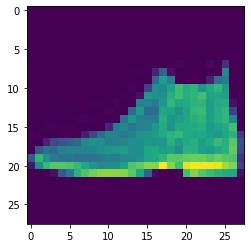

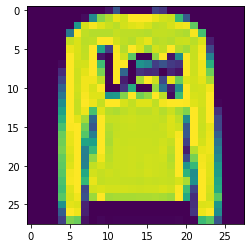

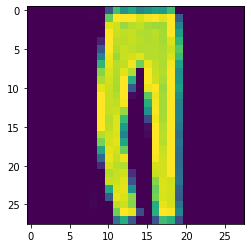

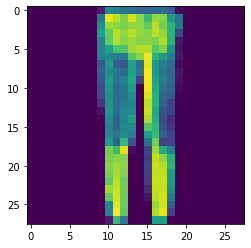

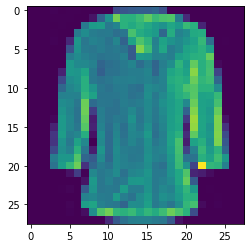

In [6]:
for i in range(0,5):
    plt.imshow(test_x[i])
    plt.show()

In [7]:
train_img = []
for img_name in tqdm(train['id']):
    # defining the image path
    image_path = '../IdentifyTheApparel/train_LbELtWX/train/' + str(img_name) + '.png'
    # reading the image
    img = imread(image_path, as_gray=True)
    # normalizing the pixel values
    img /= 255.0
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    train_img.append(img)

# converting the list to numpy array
train_x = np.array(train_img)
# defining the target
train_y = train['label'].values
train_x.shape

100%|███████████████████████████████████████████████████████████████████████████| 60000/60000 [08:50<00:00, 113.12it/s]


(60000, 28, 28)

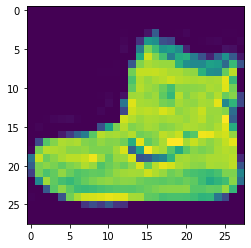

Actual Target :  9


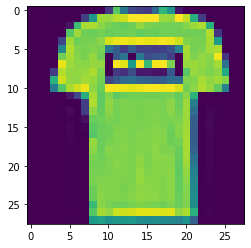

Actual Target :  0


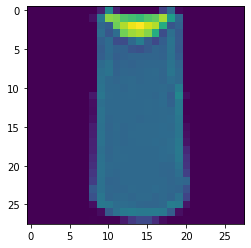

Actual Target :  0


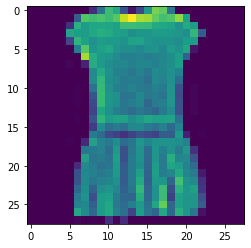

Actual Target :  3


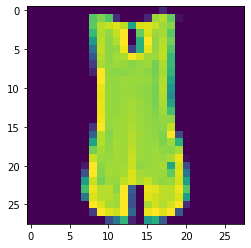

Actual Target :  0


In [8]:
for i in range(0,5):
    plt.imshow(train_x[i])
    plt.show()
    print("Actual Target : ",train_y[i])

In [11]:
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1],test_x.shape[2],1)

In [12]:
from keras.utils.np_utils import to_categorical

In [13]:
train_y = to_categorical(train_y)

In [14]:
train_x.shape, test_x.shape, train_y.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10))

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras import optimizers, losses
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from tensorflow.keras import optimizers
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten

In [16]:
def deep_cnn_advanced_nin():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (train_x.shape[1], train_x.shape[2], train_x.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [17]:
model = deep_cnn_advanced_nin()

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 50)        500       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 50)        200       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 50)        22550     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 25)        1275      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 25)        100       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 25)        0

In [20]:
model_history = model.fit(train_x, train_y  , batch_size=50, validation_split=0.3, epochs=10, verbose = 1)

Epoch 1/10
960/960 [==============================] - 211s 219ms/step - loss: 0.7282 - accuracy: 0.7433 - val_loss: 24.3923 - val_accuracy: 0.1710
Epoch 2/10
960/960 [==============================] - 204s 212ms/step - loss: 0.4522 - accuracy: 0.8409 - val_loss: 1.8076 - val_accuracy: 0.4166
Epoch 3/10
960/960 [==============================] - 205s 214ms/step - loss: 0.3887 - accuracy: 0.8624 - val_loss: 24.2055 - val_accuracy: 0.1001
Epoch 4/10
960/960 [==============================] - 202s 211ms/step - loss: 0.3548 - accuracy: 0.8761 - val_loss: 2.2487 - val_accuracy: 0.4583
Epoch 5/10
960/960 [==============================] - 205s 214ms/step - loss: 0.3317 - accuracy: 0.8831 - val_loss: 1.7007 - val_accuracy: 0.4594
Epoch 6/10
960/960 [==============================] - 208s 216ms/step - loss: 0.3111 - accuracy: 0.8917 - val_loss: 3.9362 - val_accuracy: 0.1654
Epoch 7/10
960/960 [==============================] - 178s 185ms/step - loss: 0.2931 - accuracy: 0.8977 - val_loss: 22.419

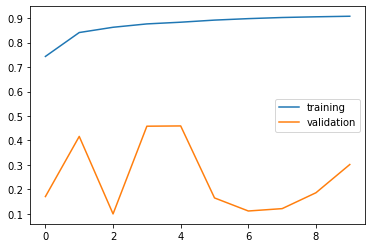

In [21]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['training','validation'])


In [23]:
submission = pd.read_csv('../IdentifyTheApparel/sample_submission_I5njJSF.csv')
submission['label'] = np.argmax(model.predict(test_x),axis=1)
submission.to_csv("submission_CNN.csv")